In [49]:
! pip install beautifulsoup4


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [50]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
def plot_top_words(df, review):
    n = len(df)
    plt.figure(figsize=(10, 5))
    sns.barplot(x='freq', y='word', hue = "word",data=df, palette="Blues_r")

    plt.xlabel("Frequency", fontsize=12)
    plt.ylabel("Words", fontsize=12)
    plt.title(f"Top {n} Most Frequent Words: {review}", fontsize=12)
    plt.grid(axis='x', linestyle="--", alpha=0.5)
    plt.show()

In [52]:

# URLs de los medios
urls = {
    "La Nación": "https://www.lanacion.com.ar/",
    "Clarin": "https://www.clarin.com/",
    "Infobae": "https://www.infobae.com/"
}

# Lista para almacenar los titulares
data = []

for medio, url in urls.items():
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    
    titles = soup.find_all("h2")[:10]
    
    for title in titles:
        data.append([medio, title.get_text(strip=True)])

# Crear un DataFrame
df = pd.DataFrame(data, columns=["diario", "titular"])

storage_csv = "./headlines/titulares.csv"
df.to_csv(storage_csv, index=False, encoding="utf-8")

# BoW Simple


In [53]:
import pandas as pd
import re
from collections import Counter

import nltk
from nltk.corpus import stopwords

In [54]:
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish')) 

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Top 10 palabras más usadas:**
gobierno: 8
milei: 5
telefónica: 4
telecom: 4
compra: 3
onu: 3
medidas: 3
ucrania: 3
40: 2
anunció: 2


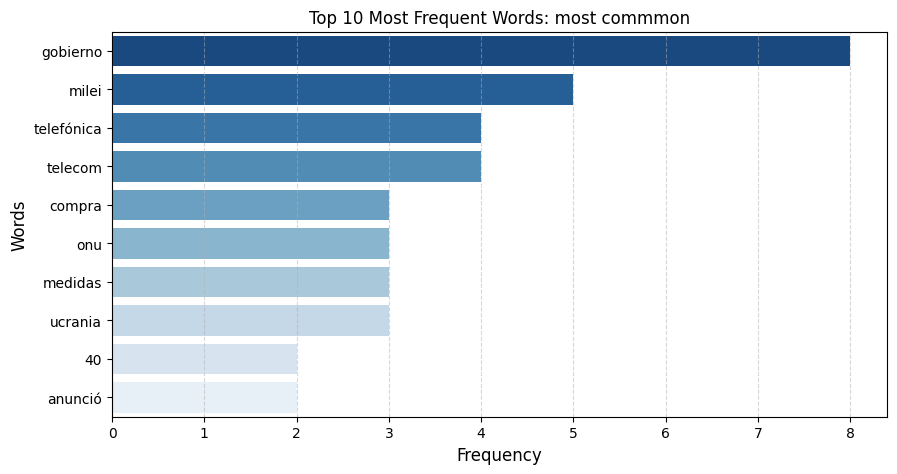

In [55]:
df = pd.read_csv(storage_csv)

#  limpieza de cada texto o titular de cada diario
def tokenize(text):
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r"[^\w\s]", "", text)  # Eliminar signos de puntuación
    words = text.split()  # Tokenizar en palabras
    words = [word for word in words if word not in stop_words]  # Filtrar stopwords
    return words

# Aplicar la función a todos los titulares
all_words = []
for title in df["titular"]:
    all_words.extend(tokenize(title))

# Contar la frecuencia de las palabras
word_freq = Counter(all_words)

# Obtener las 10 palabras más comunes
top_10_words = word_freq.most_common(10)

top_10_words_df = pd.DataFrame(top_10_words, columns=["word","freq"])

# Mostrar resultados
print("**Top 10 palabras más usadas:**")
for word, freq in top_10_words:
    print(f"{word}: {freq}")


plot_top_words(top_10_words_df,"most commmon")

# BoW

In [56]:
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer


**Top 10 palabras más usadas:**
gobierno: 8
milei: 5
telefónica: 4
telecom: 4
compra: 3
onu: 3
medidas: 3
ucrania: 3
40: 2
anunció: 2


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


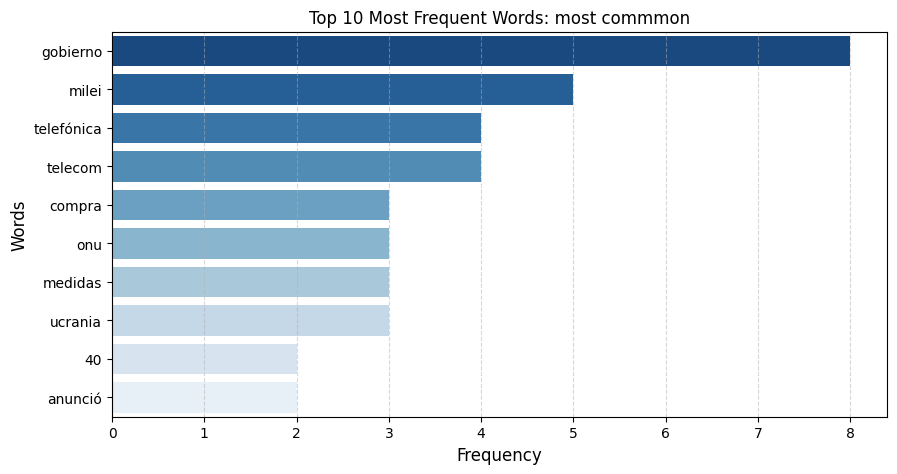

In [57]:

# Descargar recursos de NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Cargar stopwords en español
stop_words = set(stopwords.words('spanish'))

# Cargar el CSV
df = pd.read_csv(storage_csv)

# Función para tokenizar y limpiar texto
def tokenize(text):
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r"[^\w\s]", "", text)  # Eliminar signos de puntuación
    words = WordPunctTokenizer().tokenize(text)  # Tokenización con nltk -- el tokenizado lo realiza directamente desde la libreria
    words = [word for word in words if word not in stop_words]  # Eliminar stopwords
    return words

# Aplicar tokenización a todos los titulares
all_words = []
for title in df["titular"]:
    all_words.extend(tokenize(title))

# Contar la frecuencia de las palabras
word_freq = Counter(all_words)

# Obtener las 10 palabras más comunes
top_10_words = word_freq.most_common(10)

top_10_words_df = pd.DataFrame(top_10_words, columns=["word","freq"])

# Mostrar resultados
print("**Top 10 palabras más usadas:**")
for word, freq in top_10_words:
    print(f"{word}: {freq}")


plot_top_words(top_10_words_df,"most commmon")

# Ejemplo de uso de la libreria NLTK

-   Generacion de Corpus
-   Generacion de Document Text Matrix
-   Generacion de Term Text Matrix


In [58]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

In [72]:
nltk.download('punkt')
nltk.download('stopwords')

pd.options.display.max_columns = None
pd.options.display.max_rows = None

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [69]:
corpus = df['titular'].tolist()

# Tokenización y eliminación de stopwords
stop_words = set(stopwords.words('spanish'))



tokenized_corpus = [
    [word for word in WordPunctTokenizer().tokenize(title.lower()) if word.isalnum() and word not in stop_words]
    for title in corpus
]

# Generación de Document-Term Matrix (DTM)
vectorizer = CountVectorizer(analyzer=lambda x: x)  # Análisis por tokens
dtm = vectorizer.fit_transform(tokenized_corpus)

# Convertir DTM a DataFrame
dtm_df = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())
tdm_df = dtm_df.T


In [73]:
print("🔹 **Document-Term Matrix (DTM):**")
dtm_df

🔹 **Document-Term Matrix (DTM):**


,1,20,200,24,245,35,40,5,aboga,abstuvo,accionistas,acostarse,acuerdos,afd,afirman,agua,ahora,alineó,amenazante,antidóping,antiguas,anunció,aplicarán,aprobó,aranceles,arena,argentina,argumento,aseguró,asistirá,autoridades,batería,benny,beverly,bizarra,blanco,blue,bolsa,bomba,búsqueda,camioneta,canadá,casi,cayó,cinco,clarín,comisión,competencia,compra,compraron,compró,conflicto,conocieron,consejo,considerado,considerar,constituye,consultado,control,cotiza,cotización,cripto,cristina,crítico,cultivos,cvh,córdoba,david,declarar,defensa,defiende,derecha,desactivaba,desafío,desesperada,desvalijaron,determinar,deuda,diez,dueño,dólar,dólares,ee,elección,electrónica,empresarios,enacom,encabeza,encontró,entran,escándalo,española,estatuas,europa,evaluará,exige,extrema,falta,febrero,filial,fin,final,finalmente,fintech,fiscal,fiscalía,francisco,francés,funcionarios,gascón,giro,gobierno,gomez,gran,gremios,grupo,hills,histórico,hora,hoy,importante,impulsa,incumplió,informó,inmediata,insuficiencia,interno,invadió,inversión,investigará,javier,jugada,karla,kicillof,kirchner,ladrón,league,leve,lian,llovieron,mansión,marte,martínez,marzo,medidas,mejoría,milei,millones,milímetros,misteriosa,monopolio,mostró,méxico,nacional,nacionales,negras,nuevo,océano,oferta,onu,oscar,pago,papa,paro,parte,partido,pasos,paz,peronista,pertenece,pj,planteó,playas,plaza,policía,polémica,premier,preocupante,primera,proceso,próximos,pulsera,quórum,ratificaron,rearmado,rechazaron,recta,relación,renal,resolución,resultado,retirada,reunión,revés,rioja,rol,rotulada,rover,rusia,rápido,secreta,sede,seguirá,segundos,seguridad,selena,senado,serrano,sesión,si,sigue,sintonía,sofía,telecom,telefónica,tiempo,tipo,tras,tropas,trump,turista,ucrania,us,uu,vaticano,vendió,villarruel,vilo,viudas,vivo,voto,zelenski,zonas,últimas
0,0,1,0,0,0,0,2,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [74]:
# Mostrar el TDM
print("\n🔹 **Term-Document Matrix (TDM):**")
tdm_df


🔹 **Term-Document Matrix (TDM):**


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
200,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
245,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
40,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
aboga,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
abstuvo,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

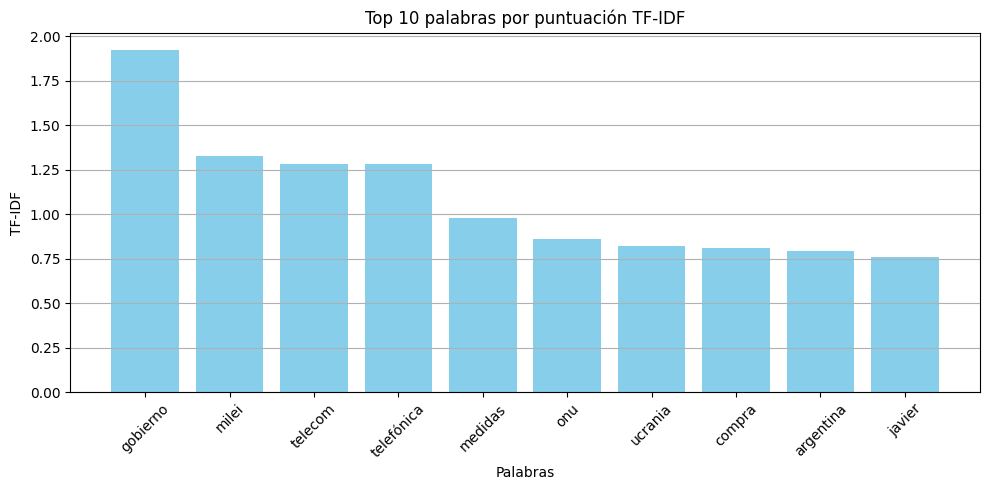

In [78]:

# Cargar stopwords en español
stop_words = set(stopwords.words('spanish'))

# Tokenización y eliminación de stopwords
df['titular_limpio'] = df['titular'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in stop_words]))

# Calcular la matriz TF-IDF
vectorizer = TfidfVectorizer(stop_words=list(stop_words))
tfidf_matrix = vectorizer.fit_transform(df['titular_limpio'])

# Obtener los nombres de las características (palabras)
features = vectorizer.get_feature_names_out()

# Convertir la matriz TF-IDF a un DataFrame para una mejor visualización
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=features)

# Sumar los valores de TF-IDF por palabra
tfidf_sum = tfidf_df.sum(axis=0)

# Crear un DataFrame con las palabras y sus puntuaciones
tfidf_words = pd.DataFrame(tfidf_sum, columns=['TF-IDF']).reset_index()
tfidf_words.columns = ['Palabra', 'TF-IDF']

# Obtener las 10 palabras más importantes
top_words = tfidf_words.nlargest(10, 'TF-IDF')

# Graficar usando Matplotlib
plt.figure(figsize=(10, 5))
plt.bar(top_words['Palabra'], top_words['TF-IDF'], color='skyblue')
plt.title('Top 10 palabras por puntuación TF-IDF')
plt.xlabel('Palabras')
plt.ylabel('TF-IDF')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()